<div style="text-align: center;">
    <h1 style="font-size:50px">ResNet101</h1>
</div>
<h1>Objective</h1>
<p style="font-size:15px;line-height: 1.5;">The objective of this project is to develop a deep learning model, specifically ResNet101, that can accurately classify images into one of ten classes based on their visual features. The ten classes in the CIFAR-10 dataset are:</p>
<ul style="font-size:15px;line-height: 1.5;">
    <li>Airplane</li>
    <li>Automobile</li>
    <li>Bird</li>
    <li>Cat</li>
    <li>Deer</li>
    <li>Dog</li>
    <li>Frog</li>
    <li>Horse</li>
    <li>Ship</li>
    <li>Truck</li>
</ul>

<p style="font-size:15px">Each class has unique visual characteristics that the model will learn to identify.</p>
<h1>Dataset</h1>
<p style="font-size:15px;line-height: 1.5;">The CIFAR-10 dataset has been used for this project. It contains 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The dataset is divided into a training set of 50,000 images and a test set of 10,000 images.</p>
<ul style="font-size:15px;line-height: 1.5;">
    <li><strong>Features</strong>: 32x32 color images with 3 channels (RGB).</li>
    <li><strong>Target</strong>: Class label of the image (one of the 10 classes).</li>
</ul>
<h1>Approach</h1>
<ul style="font-size:15px;line-height: 1.5;">
    <li>First, the dataset is explored to understand its structure and distribution of classes.</li>
    <li>Visualization of the dataset is done to show sample images from each class.</li>
    <li>Pre-processing of the dataset includes normalization and one-hot encoding of the labels.</li>
    <li>The ResNet101 model is built from scratch using TensorFlow and Keras.</li>
    <li>The model is trained on the training set and validated on the test set.</li>
    <li>Performance metrics such as accuracy and loss are evaluated and visualized for both training and testing phases.</li>
</ul>

## Loading the required libraries

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Add, GlobalAveragePooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

## Loading the CIFAR-10 Dataset

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

## Displaying images from each class

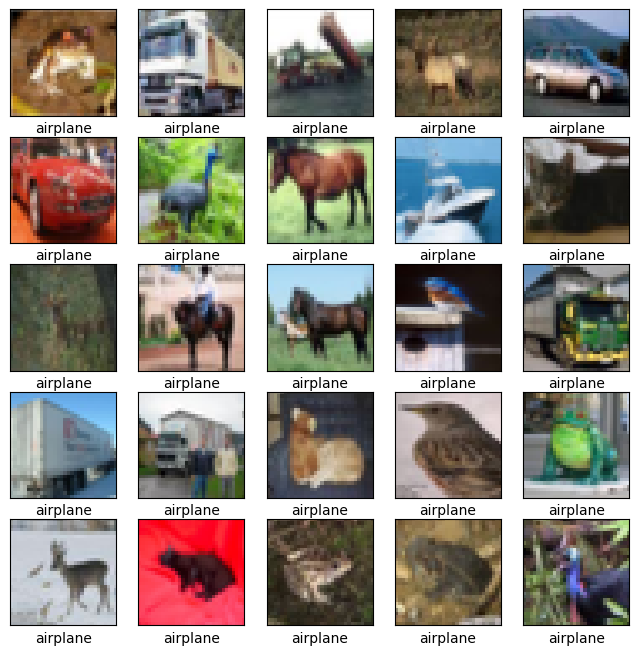

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[np.argmax(train_labels[i])])
plt.show()

## Printing the training and testing set shape

In [7]:
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Testing images shape: {test_images.shape}")
print(f"Testing labels shape: {test_labels.shape}")

Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing images shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


## Plotting the training and testing sets

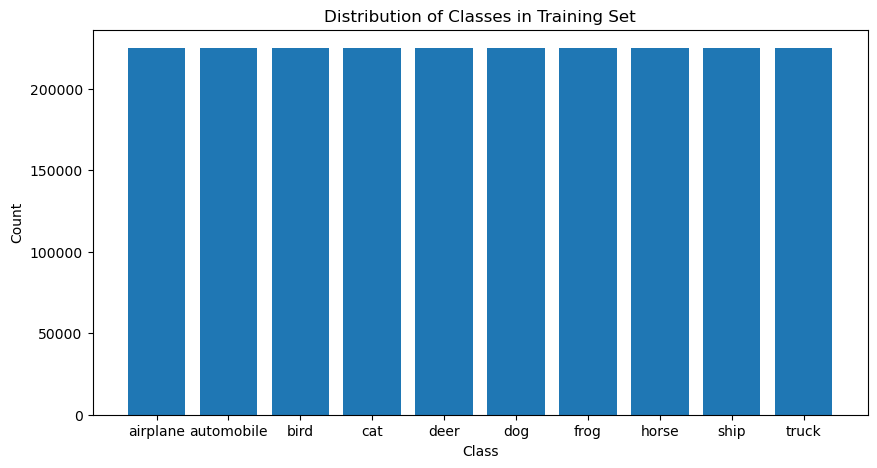

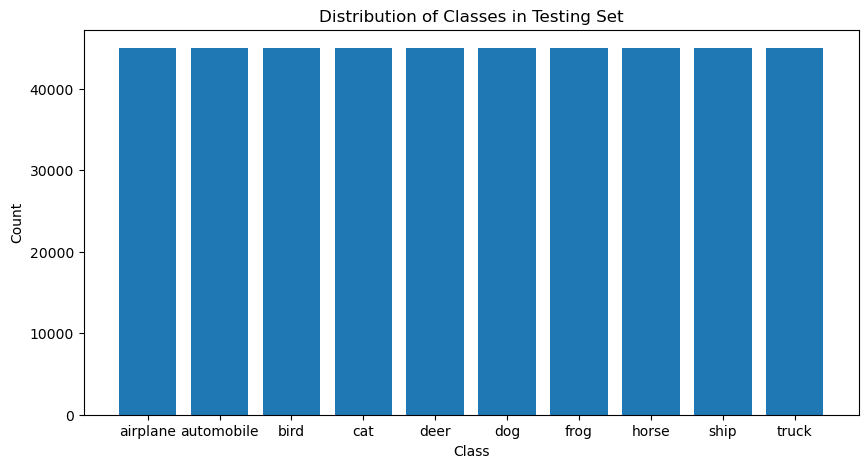

In [8]:
# Distribution of classes in training set
train_labels_count = np.sum(train_labels, axis=0)
plt.figure(figsize=(10, 5))
plt.bar(class_names, train_labels_count)
plt.title('Distribution of Classes in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Distribution of classes in testing set
test_labels_count = np.sum(test_labels, axis=0)
plt.figure(figsize=(10, 5))
plt.bar(class_names, test_labels_count)
plt.title('Distribution of Classes in Testing Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## Pre-processing the data

In [9]:
# Normalizing the data to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# One-hot encoding ef labels
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

## Creating the ResNet101 model from a scratch

In [3]:
def residual_block(x, filters, kernel_size=3, stride=1, conv_shortcut=False):
    shortcut = x
    if conv_shortcut:
        shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding='valid')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

In [4]:
def create_resnet101_scratch(input_shape=(32, 32, 3), num_classes=10):
    inputs = Input(shape=input_shape)

    x = Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    x = residual_block(x, 64, conv_shortcut=True)
    for _ in range(2):
        x = residual_block(x, 64)

    x = residual_block(x, 128, stride=2, conv_shortcut=True)
    for _ in range(3):
        x = residual_block(x, 128)

    x = residual_block(x, 256, stride=2, conv_shortcut=True)
    for _ in range(22):  # 22 residual blocks for ResNet-101
        x = residual_block(x, 256)

    x = residual_block(x, 512, stride=2, conv_shortcut=True)
    for _ in range(2):
        x = residual_block(x, 512)

    x = GlobalAveragePooling2D()(x)
    x = Flatten()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=x)
    return model

In [5]:
resnet101_scratch = create_resnet101_scratch()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
resnet101_scratch.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
resnet101_scratch.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 16, 16, 64)           9472      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 16, 16, 64)           256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 16, 16, 64)           0         ['batch_normalization[0][0

## Training the model

In [7]:
resnet101_history = resnet101_scratch.fit(
    train_images, train_labels,
    epochs=50,
    validation_data=(test_images, test_labels)
)

Epoch 1/50
1563/1563 [==============================] - 112s 72ms/step - loss: 0.0739 - accuracy: 0.9747 - val_loss: 1.4134 - val_accuracy: 0.7003
Epoch 2/50
1563/1563 [==============================] - 114s 73ms/step - loss: 0.0631 - accuracy: 0.9789 - val_loss: 1.6732 - val_accuracy: 0.6811
Epoch 3/50
1563/1563 [==============================] - 113s 72ms/step - loss: 0.0616 - accuracy: 0.9790 - val_loss: 1.7404 - val_accuracy: 0.6699
Epoch 4/50
1563/1563 [==============================] - 118s 76ms/step - loss: 0.0609 - accuracy: 0.9789 - val_loss: 1.5497 - val_accuracy: 0.6994
Epoch 5/50
1563/1563 [==============================] - 113s 72ms/step - loss: 0.0624 - accuracy: 0.9789 - val_loss: 1.5560 - val_accuracy: 0.6946
Epoch 6/50
1563/1563 [==============================] - 119s 76ms/step - loss: 0.0637 - accuracy: 0.9783 - val_loss: 1.4761 - val_accuracy: 0.7096
Epoch 7/50
1563/1563 [==============================] - 113s 72ms/step - loss: 0.0504 - accuracy: 0.9828 - val_loss: 1

## Printing the training and testing accuracy

In [8]:
train_loss = resnet101_history.history['loss']
train_acc = resnet101_history.history['accuracy']
val_loss = resnet101_history.history['val_loss']
val_acc = resnet101_history.history['val_accuracy']

print(f"Final Training Accuracy: {train_acc[-1]*100:.2f}%")
print(f"Final Testing Accuracy: {val_acc[-1]*100:.2f}%")

Final Training Accuracy: 98.90%
Final Testing Accuracy: 71.11%


## Plotting the accuracy and loss

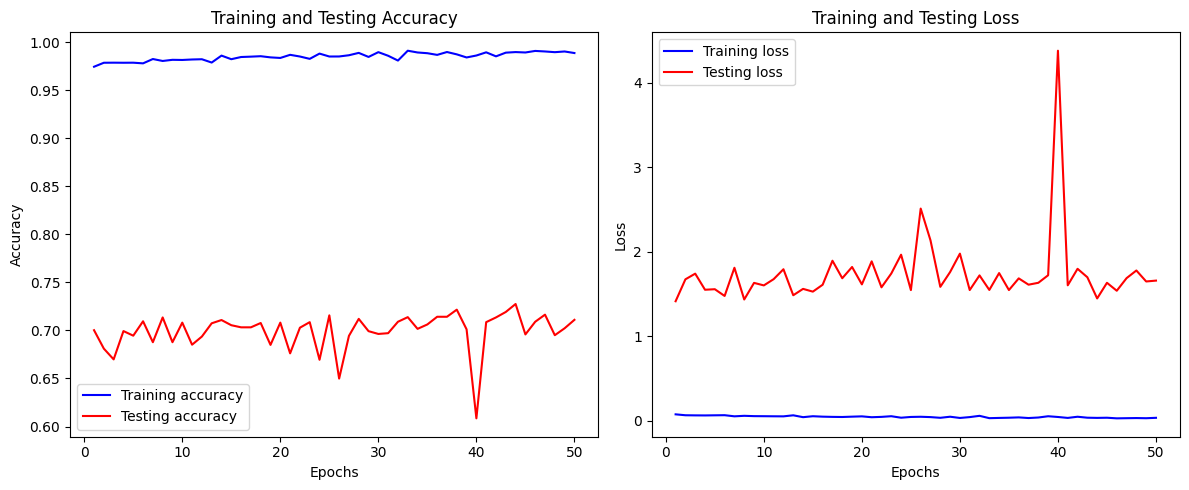

In [9]:
import matplotlib.pyplot as plt
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Testing accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Testing loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()